<a href="https://colab.research.google.com/github/dhowfeekhasan/3d-bee-path-simulator/blob/main/RRN_11_and_13(Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import csv
from datetime import datetime, timedelta
import random

# Function to get weather data from OpenWeather API
def get_weather_data(city_name):
    api_key = '50c7a10060b81f58464c14ee289d4715'
    base_url = f'http://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={api_key}&units=metric'
    response = requests.get(base_url)
    data = response.json()
    return {
        'temperature': data['main']['temp'],
        'humidity': data['main']['humidity'],
        'weather': data['weather'][0]['description']
    }

# Collect bus travel data
def collect_bus_data(num_points=10000):
    bus_routes = ['A', 'B', 'C', 'D', 'E']  # Example routes
    bus_data = []
    weather_data = get_weather_data("London")  # Example weather data for all bus data points

    for _ in range(num_points):
        route = random.choice(bus_routes)  # Random route
        travel_time = random.randint(10, 120)  # Random travel time between 10 to 120 minutes
        timestamp = datetime.now() - timedelta(minutes=random.randint(0, 100000))  # Random timestamp
        bus_id = random.randint(1000, 9999)  # Random bus ID
        location = f"Location {random.randint(1, 100)}"  # Random location name
        day_of_week = timestamp.strftime('%A')  # Day of the week
        travel_date = timestamp.strftime('%Y-%m-%d')  # Date in YYYY-MM-DD format
        travel_time_hour = timestamp.strftime('%H:%M:%S')  # Time of travel
        delay = random.randint(0, 15)  # Random delay in minutes
        temperature = weather_data['temperature']  # Temperature from weather data
        humidity = weather_data['humidity']  # Humidity from weather data
        weather = weather_data['weather']  # Weather description

        bus_data.append({
            'route': route,
            'travel_time': travel_time,
            'timestamp': timestamp,
            'bus_id': bus_id,
            'location': location,
            'day_of_week': day_of_week,
            'travel_date': travel_date,
            'travel_time_hour': travel_time_hour,
            'delay': delay,
            'temperature': temperature,
            'humidity': humidity,
            'weather': weather
        })

    return bus_data

# Generate and print bus data
bus_data = collect_bus_data(10000)
for data in bus_data[:10]:  # Print the first 10 records as a sample
    print(data)

# Save the data to a CSV file
with open('bus_travel_data.csv', mode='w', newline='', encoding='utf-8') as file:
    fieldnames = ['route', 'travel_time', 'timestamp', 'bus_id', 'location', 'day_of_week',
                  'travel_date', 'travel_time_hour', 'delay', 'temperature', 'humidity', 'weather']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(bus_data)

print("Data generation complete. Saved to 'bus_travel_data.csv'.")



{'route': 'C', 'travel_time': 94, 'timestamp': datetime.datetime(2024, 9, 20, 3, 42, 42, 557052), 'bus_id': 9975, 'location': 'Location 87', 'day_of_week': 'Friday', 'travel_date': '2024-09-20', 'travel_time_hour': '03:42:42', 'delay': 12, 'temperature': 1.67, 'humidity': 84, 'weather': 'clear sky'}
{'route': 'D', 'travel_time': 18, 'timestamp': datetime.datetime(2024, 10, 30, 16, 36, 42, 557136), 'bus_id': 7513, 'location': 'Location 3', 'day_of_week': 'Wednesday', 'travel_date': '2024-10-30', 'travel_time_hour': '16:36:42', 'delay': 8, 'temperature': 1.67, 'humidity': 84, 'weather': 'clear sky'}
{'route': 'E', 'travel_time': 120, 'timestamp': datetime.datetime(2024, 11, 14, 11, 57, 42, 557164), 'bus_id': 9253, 'location': 'Location 90', 'day_of_week': 'Thursday', 'travel_date': '2024-11-14', 'travel_time_hour': '11:57:42', 'delay': 0, 'temperature': 1.67, 'humidity': 84, 'weather': 'clear sky'}
{'route': 'E', 'travel_time': 56, 'timestamp': datetime.datetime(2024, 10, 8, 16, 11, 42, 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName('BusDataAnalysis').getOrCreate()

# Load bus data
bus_df = spark.read.csv('bus_travel_data.csv', header=True, inferSchema=True)

# Analysis: Calculate average travel time per route
avg_travel_time = bus_df.groupBy('route').avg('travel_time')
avg_travel_time.show()

# Example: Find routes with maximum delay
max_delay = bus_df.orderBy(col('delay').desc()).first()
print(f"Max delay: {max_delay['route']} with a delay of {max_delay['delay']} minutes.")

# Example: Count the number of buses per location
buses_per_location = bus_df.groupBy('location').count()
buses_per_location.show()

# Example: Calculate average temperature per bus route
avg_temperature = bus_df.groupBy('route').avg('temperature')
avg_temperature.show()

# Example: Find the route with the highest humidity
max_humidity = bus_df.orderBy(col('humidity').desc()).first()
print(f"Route with max humidity: {max_humidity['route']} with {max_humidity['humidity']}% humidity.")

# Example: Count the number of buses by day of the week
buses_per_day_of_week = bus_df.groupBy('day_of_week').count()
buses_per_day_of_week.show()

# Save processed data
bus_df.write.csv('processed_bus_data.csv', header=True)

# Stop the Spark session
spark.stop()



+-----+-----------------+
|route| avg(travel_time)|
+-----+-----------------+
|    E|64.44637537239325|
|    B|63.46740220661986|
|    D|64.81212121212121|
|    C|64.81611468116658|
|    A|65.42031171442936|
+-----+-----------------+

Max delay: A with a delay of 15 minutes.
+------------+-----+
|    location|count|
+------------+-----+
| Location 85|   87|
| Location 36|   92|
| Location 91|  110|
| Location 15|   88|
| Location 75|   86|
| Location 56|  102|
|Location 100|  106|
| Location 43|   84|
| Location 27|   95|
| Location 73|   96|
| Location 50|  114|
| Location 79|  108|
| Location 97|   91|
| Location 47|   94|
| Location 71|   93|
| Location 94|   84|
|  Location 6|  105|
| Location 60|   93|
| Location 64|  110|
| Location 41|  112|
+------------+-----+
only showing top 20 rows

+-----+------------------+
|route|  avg(temperature)|
+-----+------------------+
|    E| 1.670000000000045|
|    B|1.6700000000000448|
|    D|1.6700000000000446|
|    C| 1.670000000000045|
|    

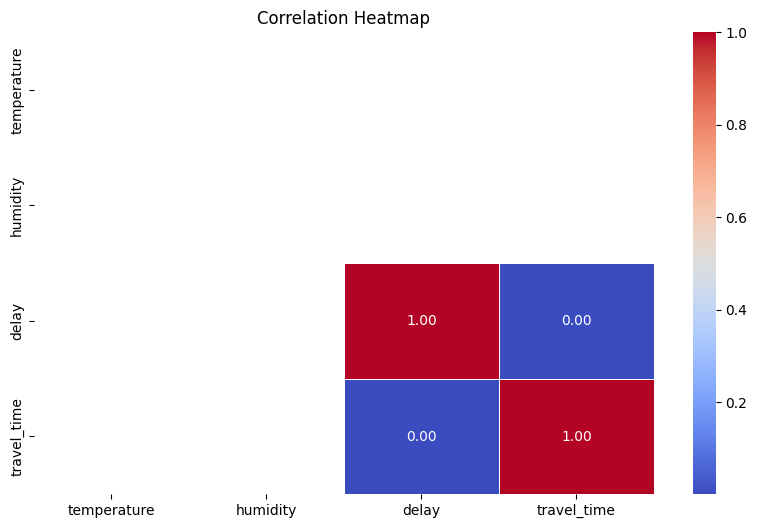

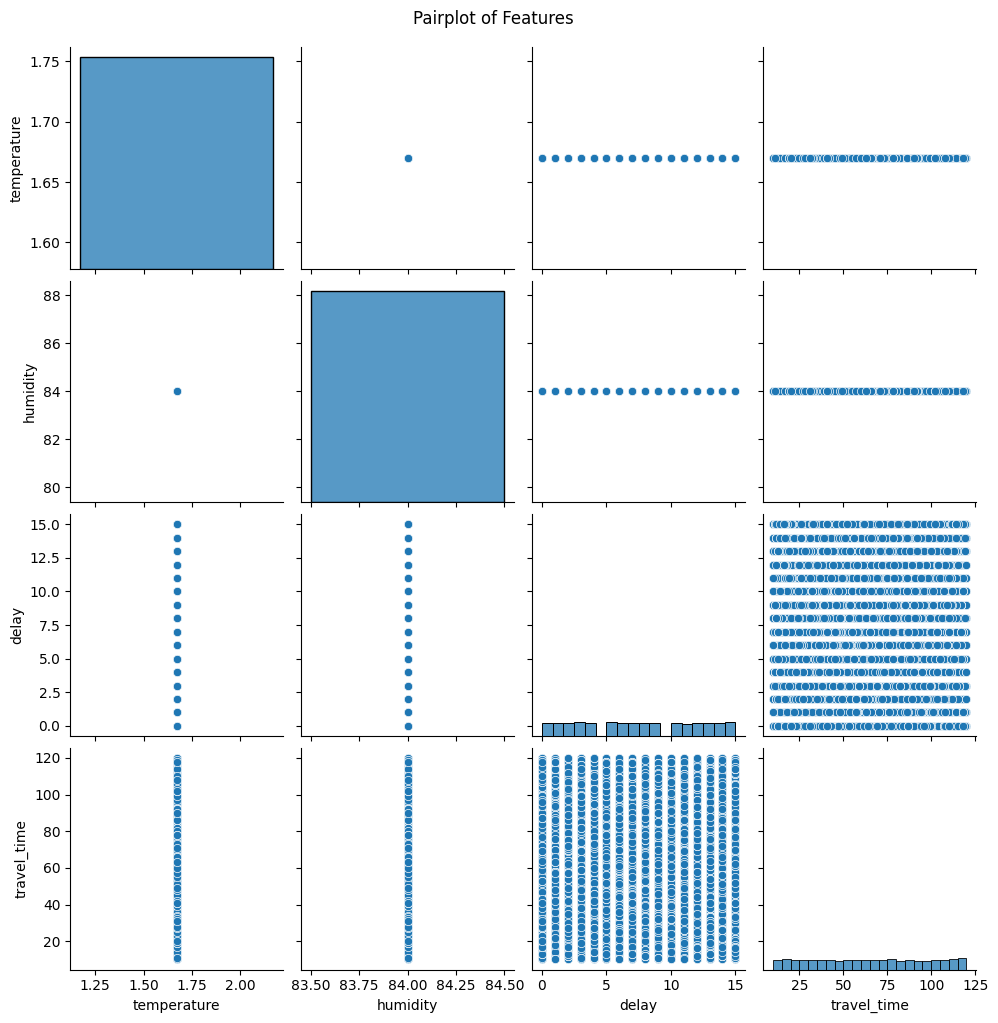

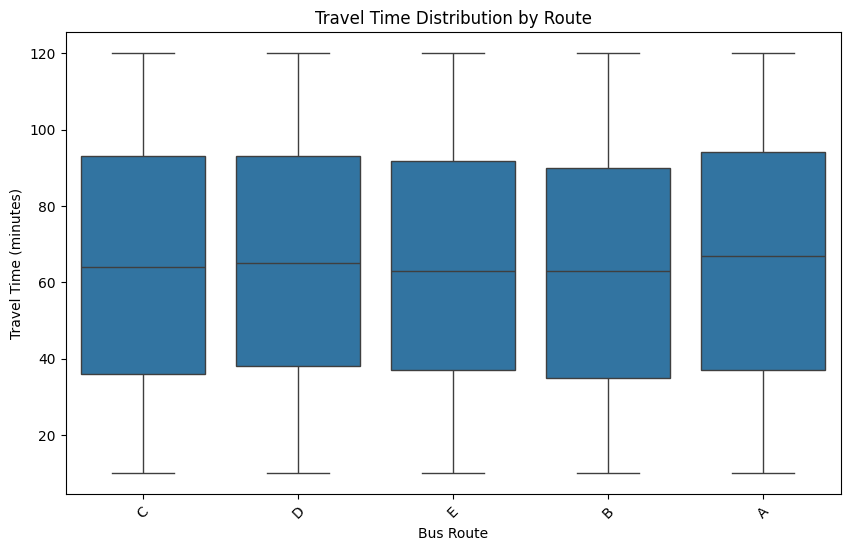

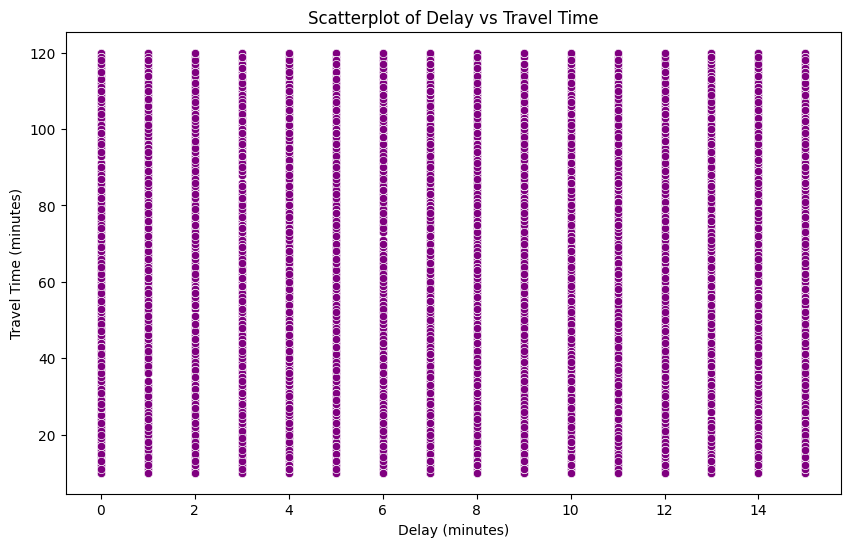

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Heatmap of Correlation between Features
plt.figure(figsize=(10, 6))
correlation_matrix = data[['temperature', 'humidity', 'delay', 'travel_time']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 2. Pairplot for Feature Relationships
sns.pairplot(data[['temperature', 'humidity', 'delay', 'travel_time']])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# 3. Boxplot of `travel_time` by `route`
plt.figure(figsize=(10, 6))
sns.boxplot(x='route', y='travel_time', data=data)
plt.title('Travel Time Distribution by Route')
plt.xlabel('Bus Route')
plt.ylabel('Travel Time (minutes)')
plt.xticks(rotation=45)
plt.show()

# 4. Scatterplot of `delay` vs `travel_time`
plt.figure(figsize=(10, 6))
sns.scatterplot(x='delay', y='travel_time', data=data, color='purple')
plt.title('Scatterplot of Delay vs Travel Time')
plt.xlabel('Delay (minutes)')
plt.ylabel('Travel Time (minutes)')
plt.show()


In [ ]:
from google.colab import drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib  # For saving and loading the model
import glob # Import glob to find files within a directory

# Load the preprocessed data from the 'processed_bus_data.csv' directory
# Assuming the data is saved as multiple CSV files within this directory
files = glob.glob('processed_bus_data.csv/*.csv')  # Find all CSV files in the directory
data = pd.concat([pd.read_csv(f) for f in files], ignore_index=True) # Concatenate data from all files

# Feature Engineering (Example: Add interaction term)
# data['temp_humidity'] = data['temperature'] * data['humidity']

# Select features (X) and target (y)
features = ['temperature', 'humidity', 'delay']  # You can add more relevant features here
target = 'travel_time'

X = data[features]
y = data[target]

# Handle missing values (if any) - Impute with the mean
for col in X.columns:
    if X[col].isnull().any():
        X[col].fillna(X[col].mean(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor (more robust than linear regression)
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune hyperparameters
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Save the trained model
joblib.dump(model, 'bus_travel_time_model.pkl')

# Prediction function (called from the web app)
def predict_travel_time(location, temperature, humidity, delay):  # Add location as input
    # ... (Get bus ID, current timing, etc. based on location. This part depends on your data sources.)
    # For now, we'll simulate this
    bus_id = np.random.randint(1000, 9999)
    current_time = pd.Timestamp.now()

    # Create input for the model
    input_data = pd.DataFrame({
        'temperature': [temperature],
        'humidity': [humidity],
        'delay': [delay]
    })

    # Load the trained model
    loaded_model = joblib.load('bus_travel_time_model.pkl')

    # Make prediction
    predicted_travel_time = loaded_model.predict(input_data)[0]

    # Estimated arrival time
    arrival_time = current_time + pd.Timedelta(minutes=predicted_travel_time)

    return bus_id, current_time, arrival_time

# Example
location = "Vandalur, Chennai"
temperature = 28  # example value
humidity = 75  # example value
delay = 5  # example value

bus_id, current_time, arrival_time = predict_travel_time(location, temperature, humidity, delay)

print(f"Bus ID: {bus_id}")
print(f"Current Time: {current_time}")
print(f"Predicted Arrival Time: {arrival_time}")

Mean Squared Error: 998.150275459035
Bus ID: 6228
Current Time: 2024-11-20 19:20:19.721412
Predicted Arrival Time: 2024-11-20 20:24:48.504460737


In [ ]:
from google.colab import drive
drive.mount('/content/drive')